# Feature Engineering and Feature Selection

## Feature Engineering
- Hanlding missing values
- Hanlding categorical variables
    - nominal data- one hot encoding
    - Ordinal variables- Label/Ordinal encoding , mapping
- Handling numerical variables
    - Scaling
        - Normalization (range (0-1))
        - standardization (mean=0, std=1)
    - Skewness
        -log10
        - loge
        - square root
        - inverse
        - reflect and do above operations
    - Binning and Discretization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  Binning / Discritization

In [2]:
df = pd.DataFrame({
    'Age': [10,3, 15, 13, 26, 29, 40, 11, 21, 35, 45, 61, 75, 5],
})
df

,Age
0,10
1,3
2,15
3,13
4,26
5,29
6,40
7,11
8,21
9,35


In [3]:
intervals=[0, 5, 18, 30, 60, 85]
labels=['Infant', 'Child', 'Teenager', 'Adult', 'Senior']
df["Age_Custom_bin"]=pd.cut(df["Age"], bins=intervals, labels=labels)
df

,Age,Age_Custom_bin
0,10,Child
1,3,Infant
2,15,Child
3,13,Child
4,26,Teenager
5,29,Teenager
6,40,Adult
7,11,Child
8,21,Teenager
9,35,Adult


In [4]:
df_salary=pd.DataFrame({
    'Salary': [1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 9e4, 1e5],
})

In [5]:
intervals=[0, 2e4, 4e4, 6e4, 8e4, 1e5]
labels=['Low', 'Medium', 'High', 'Very High', 'Extreme']
df_salary["Salary_Custom_bin"]=pd.cut(df_salary["Salary"], bins=intervals, labels=labels)
df_salary

,Salary,Salary_Custom_bin
0,10000.0,Low
1,20000.0,Low
2,30000.0,Medium
3,40000.0,Medium
4,50000.0,High
5,60000.0,High
6,70000.0,Very High
7,80000.0,Very High
8,90000.0,Extreme
9,100000.0,Extreme


### RAtion features

In [6]:
df = pd.DataFrame({
    'Date':['2025-01-11', '2025-01-13', '2025-01-20'],
    'item': ['a', 'b', 'c'],
    'Quantity': [5, 2, 7],
    'Total': [100, 50, 51],
})
df

,Date,item,Quantity,Total
0,2025-01-11,a,5,100
1,2025-01-13,b,2,50
2,2025-01-20,c,7,51


In [7]:
df["per_unit_rate"]=df["Total"]/df["Quantity"]
df

,Date,item,Quantity,Total,per_unit_rate
0,2025-01-11,a,5,100,20.000000
1,2025-01-13,b,2,50,25.000000
2,2025-01-20,c,7,51,7.285714


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3 non-null      object 
 1   item           3 non-null      object 
 2   Quantity       3 non-null      int64  
 3   Total          3 non-null      int64  
 4   per_unit_rate  3 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 252.0+ bytes


In [9]:
df["Date"]=pd.to_datetime(df["Date"])
df

,Date,item,Quantity,Total,per_unit_rate
0,2025-01-11,a,5,100,20.000000
1,2025-01-13,b,2,50,25.000000
2,2025-01-20,c,7,51,7.285714


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3 non-null      datetime64[ns]
 1   item           3 non-null      object        
 2   Quantity       3 non-null      int64         
 3   Total          3 non-null      int64         
 4   per_unit_rate  3 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 252.0+ bytes


### Feature Selection

In [21]:
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [2.01, 4.02, 6.01, 7.99, 10.1],
    'C': [5, 3, 1, 4, 2],
    'D': [4, 8, 12, 16, 20],
    'Y': [10, 12, 15, 18, 20]
})
df

,A,B,C,D,Y
0,1,2.01,5,4,10
1,2,4.02,3,8,12
2,3,6.01,1,12,15
3,4,7.99,4,16,18
4,5,10.10,2,20,20


In [22]:
corr_matrix=df.corr(method="pearson")

<Axes: >

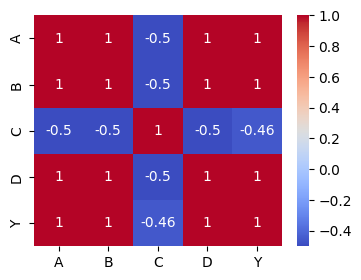

In [23]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(method="pearson"), cmap="coolwarm", annot=True)

In [32]:
# features with correlation higher than 0.8 and lower than -0.8 are highly correlated
# features A and B are highly correlated with feature D, so removing A and B
df.drop(columns=['A', 'B'], inplace=True)
uppprt_traingle=np.triu(corr_matrix.abs(), k=1)
uppprt_traingle
df

,C,D,Y
0,5,4,10
1,3,8,12
2,1,12,15
3,4,16,18
4,2,20,20


In [31]:
highly_corr_cols = [col for col in uppprt_traingle.flatten() if col > 0.8]
highly_corr_cols

[np.float64(0.9999375708829988),
 np.float64(1.0),
 np.float64(0.9970544855015815),
 np.float64(0.999937570882999),
 np.float64(0.9964213342347921),
 np.float64(0.9970544855015815)]